<a href="https://colab.research.google.com/github/marcus2188/Covid-19-Modelling/blob/master/Team_Marcus_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The world is scrambling for solutions to mitigate the scale of this pandemic. Solutions can range from policies that reduce the total cases and deaths, to prediction models that help anticipate the demand for critical resources (masks and hospital beds). Our data science field plays an indispensible role to help model future trends for viral infections. It can also classify the fatality of patients based on key attributes.

Machine learning algorithms have the potential to forecast and predict the severity of a patient's illness based on many input factors. This is useful for proper allocation of medical resources to best suit the needs of patients who require them more. Machine learning helps healthcare providers to reduce the fatality rate significantly.

More specifically, we will utilise both Logistic Regression and Multilayer Perceptron (Artificial Neural Network) models in our machine learning analysis.

### Import libraries

In [ ]:
# Basic Libraries
import matplotlib.pyplot as plt                         # Simple Diagrams
import pandas as pd                                     # Tables and dataframes
import numpy as np                                      # Math functions
import seaborn as sns                                   # Appealing diagrams
from google.colab import drive                          # For mounting files from gdrive
from scipy import stats                                 # For scientific functions

# Machine Learning Libraries
from sklearn.model_selection import train_test_split    # Split dataset into training and test sets
from sklearn.linear_model import LogisticRegression     # Logistic Regression
from sklearn.neural_network import MLPClassifier        # Neural network of perceptrons
from sklearn.model_selection import cross_val_score     # Cross validate training set and metrics
from sklearn.metrics import confusion_matrix            # Plot confusion matrix for classification
from sklearn.metrics import classification_report       # Complete report of precision, recall and f1 score
from sklearn.model_selection import GridSearchCV        # Grid search parameters for models

### Preprocessing of dataset

We will utilise the `patient_data_v6` dataset specifically prepared for machine learning analysis. Additionally in this section, we shall process and clean the dataset in accordance to the previous notebook.

In [ ]:
drive.mount('/content/drive')        # Mount at file location
patient_data_v6 = pd.read_csv('/content/drive/My Drive/lifehack2020_files/v6.csv')     # Preprocessed competition dataset with int/float patient features


In [ ]:
patient_data_v6      # Print first and last 5 rows

,age,age_band,background_diseases_binary,country,origin,severity_illness,sex,smoking,treatment,confirmed_date_D,deceased_date_D,released_date_D,return_date_D,date_onset_symptoms_D,return_date_until_date_onset_symptoms,date_onset_symptoms_until_confirmed_date,confirmed_date_until_released_date,confirmed_date_until_deceased_date,severity_illness_infectious_person,symptoms_pneumonia,symptoms_sore_throat,symptoms_fever,symptoms_cough,symptoms_breathing_difficulty,symptoms_organ_failure,symptoms_respiratory_failure,symptoms_septic_shock,symptoms_rhinorrhoea,symptoms_headache,symptoms_myalgia,symptoms_dysphagia,symptoms_cardiogenic_shock,symptoms_acute_coronary_syndrome,symptoms_kidney_failure,symptoms_dizziness,symptoms_gastrointestinal_bleeding,symptoms_respiratory_infection,symptoms_cardiac_arrest,symptoms_cardiac_arrhythmia,symptoms_hypertension,...,background_diseases_renal_transplant,background_diseases_pneumonia,background_diseases_cardiovascular,background_diseases_cardiomyopathy,background_diseases_colon_cancer,background_diseases_prostate_cancer,background_diseases_lung_cancer,background_diseases_tongue_cancer,background_diseases_benign_prostatic_hyperplasia,background_diseases_prostate_hypertrophy,background_diseases_impaired_fasting_glucose,background_diseases_dyslipidemia,background_diseases_atherosclerosis,background_diseases_atherosclerotic,background_diseases_vestibular_disorders,background_diseases_thalassemia,background_diseases_gastritis,background_diseases_brain_haemorrhage,background_diseases_leukemia,background_diseases_on_dialysis,background_diseases_obesity,background_diseases_chronic_obstructive_pulmonary,background_diseases_immunosuppression,background_diseases_hiv,background_diseases_stent__implanted,background_diseases_hepatitis_B,background_diseases_coronary_bypass_surgery,background_diseases_hypertriglyceridemia,background_diseases_tuberculosis,background_diseases_frequent_ventricular_premature_beat,background_diseases_encephalomalacia,background_diseases_hip_replacement,background_diseases_parkinson,background_diseases_gastrointestinal_bleeding,background_diseases_stenocardia,background_diseases_myeloma,background_diseases_azotemia,background_diseases_atrial_fibrillation,background_diseases_arrhythmia,background_diseases_hypothyroidism
0,NaN,NaN,NaN,0.0,france,0.0,0.0,NaN,0,119.0,NaN,94.0,NaN,NaN,NaN,NaN,-25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,0.0,france,1.0,0.0,NaN,0,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,0.0,france,1.0,1.0,NaN,0,119.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,france,0.0,0.0,NaN,0,123.0,NaN,126.0,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,0.0,france,1.0,0.0,NaN,1,125.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,.

In [ ]:
relevant_cols = patient_data_v6.iloc[:, [0, 2, 5, 6, 7, 8, 16, 17]+[x for x in range(19, 141)]]    # Select index of relevant columns
relevant_cols        # Print the table

,age,background_diseases_binary,severity_illness,sex,smoking,treatment,confirmed_date_until_released_date,confirmed_date_until_deceased_date,symptoms_pneumonia,symptoms_sore_throat,symptoms_fever,symptoms_cough,symptoms_breathing_difficulty,symptoms_organ_failure,symptoms_respiratory_failure,symptoms_septic_shock,symptoms_rhinorrhoea,symptoms_headache,symptoms_myalgia,symptoms_dysphagia,symptoms_cardiogenic_shock,symptoms_acute_coronary_syndrome,symptoms_kidney_failure,symptoms_dizziness,symptoms_gastrointestinal_bleeding,symptoms_respiratory_infection,symptoms_cardiac_arrest,symptoms_cardiac_arrhythmia,symptoms_hypertension,symptoms_heart_failure,symptoms_heart_attack,symptoms_azotemia,symptoms_electrolyte_disorders,symptoms_sepsis,symptoms_pleuritic_chest_pain,symptoms_fatigue,symptoms_stuffy_nose,symptoms_nausea,symptoms_dry_throat,symptoms_sputum,...,background_diseases_renal_transplant,background_diseases_pneumonia,background_diseases_cardiovascular,background_diseases_cardiomyopathy,background_diseases_colon_cancer,background_diseases_prostate_cancer,background_diseases_lung_cancer,background_diseases_tongue_cancer,background_diseases_benign_prostatic_hyperplasia,background_diseases_prostate_hypertrophy,background_diseases_impaired_fasting_glucose,background_diseases_dyslipidemia,background_diseases_atherosclerosis,background_diseases_atherosclerotic,background_diseases_vestibular_disorders,background_diseases_thalassemia,background_diseases_gastritis,background_diseases_brain_haemorrhage,background_diseases_leukemia,background_diseases_on_dialysis,background_diseases_obesity,background_diseases_chronic_obstructive_pulmonary,background_diseases_immunosuppression,background_diseases_hiv,background_diseases_stent__implanted,background_diseases_hepatitis_B,background_diseases_coronary_bypass_surgery,background_diseases_hypertriglyceridemia,background_diseases_tuberculosis,background_diseases_frequent_ventricular_premature_beat,background_diseases_encephalomalacia,background_diseases_hip_replacement,background_diseases_parkinson,background_diseases_gastrointestinal_bleeding,background_diseases_stenocardia,background_diseases_myeloma,background_diseases_azotemia,background_diseases_atrial_fibrillation,background_diseases_arrhythmia,background_diseases_hypothyroidism
0,NaN,NaN,0.0,0.0,NaN,0,-25.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,1.0,0.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,1.0,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,0.0,0.0,NaN,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,1.0,0.0,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

To best observe the relevant columns from the raw dataset, we dropped several attributes deemed not an integral part of training our machine learning model. More specifically, the `country`, `origin`, and the discrete date columns are removed from the new table `relevant_cols`.

In [ ]:
for index, col in enumerate(relevant_cols):              # Iterate through columns
  if relevant_cols[col].isnull().any() and index in [0, 2, 5, 6, 7, 8, 16, 17]:     # Check for null values in specified columns
    x = col.rjust(40, ' ') + ': Contains null values'    # Formats output to right justify
    print(x)                                             # Output

                                     age: Contains null values
                        severity_illness: Contains null values
                               treatment: Contains null values
      confirmed_date_until_released_date: Contains null values
      confirmed_date_until_deceased_date: Contains null values
                      symptoms_pneumonia: Contains null values
                    symptoms_rhinorrhoea: Contains null values
                       symptoms_headache: Contains null values


The above output shows that all the non one-hot encoded columns contain null datapoints. These null datapoints could be due to corrupt data, incomplete extraction or simply missing values. We will handle the null values by dropping or imputation. This decision is made to ensure that there is no significant loss of data points, which will no doubt hinder our machine learning analysis.

In [ ]:
print(relevant_cols['age'].dtype)     # Prints datatype of age 
print()                               # Kick to new line
print(relevant_cols.isnull().sum())   # Prints how many null values are in each column

float64

age                                        561737
background_diseases_binary                 491888
severity_illness                           863994
sex                                        551816
smoking                                    776459
                                            ...  
background_diseases_myeloma                967865
background_diseases_azotemia               967865
background_diseases_atrial_fibrillation    967865
background_diseases_arrhythmia             967865
background_diseases_hypothyroidism         967865
Length: 130, dtype: int64


We will examine all the columns first and foremost. Observe that dropping any rows containing null values will cause a huge loss of data (e.g. 863994 entries). Therefore, we should impute data whenever possible, wherever possible.

The `age` column is a series of type `float64`. Null values in all numeric columns are traditionally imputed with either mean, median or mode. Using these imputation methods we can prevent the loss of data and add variance to the dataset. This is a popular statistical approach for handling missing numeric values.

Typically, numeric null values are replaced with mean if its column largely follows a normal distribution. If the data comprises of many outliers, median is used instead. Finally, if there is a huge occurrence of a particular value, mode is the best choice. 

Numbers aside, categorical columns like `severity_illness` shall be imputed with its modal value. This is because padding with median or mean is meaningless. 


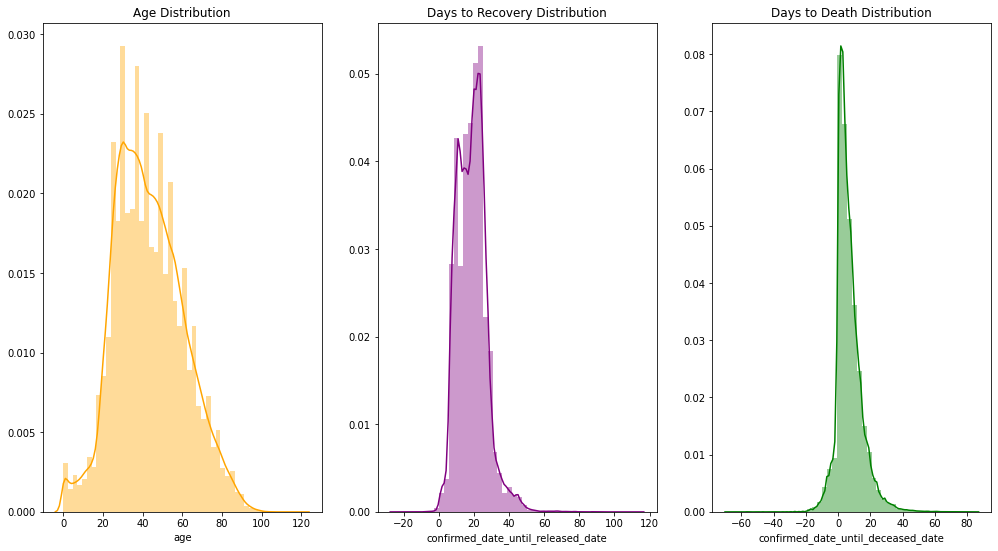

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(17, 9))       # plot 1 row with 3 plots
plt.title("Distribution of Numeric Columns")                      # gives overall title for graphs 
g1 = sns.distplot(relevant_cols['age'], kde=True, ax=axes[0], color='orange')     # plots age distribution
g2 = sns.distplot(relevant_cols['confirmed_date_until_released_date'], kde=True, ax=axes[1], color='purple')    # plots days to recovery distribution
g3 = sns.distplot(relevant_cols['confirmed_date_until_deceased_date'], kde=True, ax=axes[2], color='green')     # plots days to death distribution
g1.set(title='Age Distribution')                                  # adds title for g1
g2.set(title='Days to Recovery Distribution')                     # adds title for g2
g3.set(title='Days to Death Distribution')                        # adds title for g3                                                                         
plt.show()                                                        # shows plot 

All three numeric column distributions from the above histograms show shapes resembling a normal distribution. Thus null values will be padded with mean. This is done using numpy's handy `np.mean()` function.

In [ ]:
mean_age = np.mean(relevant_cols['age'])      # Finds mean of age column
mean_recovery_days = np.mean(relevant_cols['confirmed_date_until_released_date'])     # Finds mean number of days taken to recover
mean_death_days = np.mean(relevant_cols['confirmed_date_until_deceased_date'])        # Finds mean number of days taken to die
relevant_cols['age'].replace(np.nan, mean_age, inplace=True)                          # Replaces null values in age column with mean age
relevant_cols['confirmed_date_until_released_date'].replace(np.nan, mean_recovery_days, inplace=True)     # Replaces null values in days taken to recover column with the mean value
relevant_cols['confirmed_date_until_deceased_date'].replace(np.nan, mean_death_days, inplace=True)        # Replaces null values in days taken to die column with the mean value

In [ ]:
relevant_cols['severity_illness'].replace(np.nan, (relevant_cols.mode()).loc[0]['severity_illness'], inplace=True)   # Replaces null values with their mode   
relevant_cols['sex'].replace(np.nan, (relevant_cols.mode()).loc[0]['sex'], inplace=True)             # Replaces null values with their mode 
relevant_cols['smoking'].replace(np.nan, (relevant_cols.mode()).loc[0]['smoking'], inplace=True)     # Replaces null values with their mode 
relevant_cols['treatment'].replace('hospitalized, hospitalized', 2.0, inplace=True)       # Replaces strings with their correct float value
relevant_cols['treatment'].replace('home isolation, hospitalized', 0.0, inplace=True)     # Replaces strings with their correct float value
relevant_cols['treatment'].replace('1', 1.0, inplace=True)    # Rectify string to float
relevant_cols['treatment'].replace(np.nan, (relevant_cols.mode()).loc[0]['treatment'], inplace=True) # Replaces null values with mode

The above code segment carries out mass replacement of null values to both numeric and categorical columns. One interesting action we undertook involves correcting the `treatment` strings into their correct float values. Even numbers have been represented in the wrong data type (strings). 

This reminds us that raw datasets may contain errorneous values, and it is a good habit to check every column before continuing.



In [ ]:
relevant_cols['background_diseases_binary'].replace(np.nan, 0, inplace=True)          # replace null values in history of background diseases columns as 0 (No history of background disease)
processed_cols = relevant_cols.loc[:, 'age':'confirmed_date_until_deceased_date']     # filters columns we have processed
onehot_cols = relevant_cols.loc[:, 'symptoms_pneumonia':]       # filters columns that are one-hot encoded
onehot_cols.replace(np.nan, 0, inplace=True)                    # replaces null values in one-hot encoded columns with 0 
final_df = pd.concat([processed_cols, onehot_cols], axis=1)     # obtain the final dataframe

Above we chose to impute 0s in the null entries of `background_diseases_binary` and all the one-hot encoded columns because said columns are strictly binary (1 or 0) in nature. A null entry is interpreted as a missing value logically. In essence, a patient may have one or more background diseases (e.g. pnuemonia and Colon Cancer), which translates to a value 1 in the relevant columns and 0 in the rest. This is how one hot encoding works.

With a lack of further information, we cannot investigate the cause of null values present in one-hot-encoded columns. Hence, we decided that null values are equivalent to value 0 (negative).

The following shows our final processed dataset for machine learning. 

In [ ]:
final_df

,age,background_diseases_binary,severity_illness,sex,smoking,treatment,confirmed_date_until_released_date,confirmed_date_until_deceased_date,symptoms_pneumonia,symptoms_sore_throat,symptoms_fever,symptoms_cough,symptoms_breathing_difficulty,symptoms_organ_failure,symptoms_respiratory_failure,symptoms_septic_shock,symptoms_rhinorrhoea,symptoms_headache,symptoms_myalgia,symptoms_dysphagia,symptoms_cardiogenic_shock,symptoms_acute_coronary_syndrome,symptoms_kidney_failure,symptoms_dizziness,symptoms_gastrointestinal_bleeding,symptoms_respiratory_infection,symptoms_cardiac_arrest,symptoms_cardiac_arrhythmia,symptoms_hypertension,symptoms_heart_failure,symptoms_heart_attack,symptoms_azotemia,symptoms_electrolyte_disorders,symptoms_sepsis,symptoms_pleuritic_chest_pain,symptoms_fatigue,symptoms_stuffy_nose,symptoms_nausea,symptoms_dry_throat,symptoms_sputum,...,background_diseases_renal_transplant,background_diseases_pneumonia,background_diseases_cardiovascular,background_diseases_cardiomyopathy,background_diseases_colon_cancer,background_diseases_prostate_cancer,background_diseases_lung_cancer,background_diseases_tongue_cancer,background_diseases_benign_prostatic_hyperplasia,background_diseases_prostate_hypertrophy,background_diseases_impaired_fasting_glucose,background_diseases_dyslipidemia,background_diseases_atherosclerosis,background_diseases_atherosclerotic,background_diseases_vestibular_disorders,background_diseases_thalassemia,background_diseases_gastritis,background_diseases_brain_haemorrhage,background_diseases_leukemia,background_diseases_on_dialysis,background_diseases_obesity,background_diseases_chronic_obstructive_pulmonary,background_diseases_immunosuppression,background_diseases_hiv,background_diseases_stent__implanted,background_diseases_hepatitis_B,background_diseases_coronary_bypass_surgery,background_diseases_hypertriglyceridemia,background_diseases_tuberculosis,background_diseases_frequent_ventricular_premature_beat,background_diseases_encephalomalacia,background_diseases_hip_replacement,background_diseases_parkinson,background_diseases_gastrointestinal_bleeding,background_diseases_stenocardia,background_diseases_myeloma,background_diseases_azotemia,background_diseases_atrial_fibrillation,background_diseases_arrhythmia,background_diseases_hypothyroidism
0,43.263504,0.0,0.0,0.0,0.0,0.0,-25.000000,6.645449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,43.263504,0.0,1.0,0.0,0.0,0.0,18.729394,6.645449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,43.263504,0.0,1.0,1.0,0.0,0.0,18.729394,6.645449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,43.263504,0.0,0.0,0.0,0.0,0.0,3.000000,6.645449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,43.263504,0.0,1.0,0.0,0.0,1.0,18.729394,6.645449,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0

### Machine Learning

**With our preprocessed dataset free of null values, we are now ready to represent the data with machine learning models. These models will help us classify patients according to their severity class via all the attributes.**

#### Logistic Regression

Logistic Regression is often valued for its simplicity, its suitability for large and high-dimensional datasets. In addition, its syntax is less complicated. Logistic Regression can help us determine which target severity class a patient belongs to using a combination of different attributes. 

In [ ]:
target_df = final_df['severity_illness']    # Obtains target dataframe (severity of illness)
attributes_df = final_df.drop(columns=['severity_illness'])     # Obtains attributes dataframe for training the models
X = attributes_df.values                    # Sieve out attribute values
Y = target_df.values.ravel()                # Sieve out target values
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=8)   # Splits the dataset into train and test sets

We have processed the dataset and extracted the numpy arrays of both attributes and targets required for the logistic regression model. It is necessary to split the data into training and test sets to allow the logistic regression to be tested on unknown data. We can measure the generalisation performance that way.

In the following section, we initialise the logistic regression model, fit and score it for classification. 

In [ ]:
lrobj = LogisticRegression()    # Create LR object
lrobj.fit(x_train, y_train)     # Fit the training set
print("Training set accuracy: " , lrobj.score(x_train, y_train))    # Score training set
print("Test set accuracy: " , lrobj.score(x_test, y_test))          # Score test set

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Training set accuracy:  0.8712645700143863
Test set accuracy:  0.8717273985823396


Our code shows a baseline logistic regression model trained on the patient data. The model is trained using the training set `x_train` and `y_train`, and subsequently scored against the test set `x_test` and `y_test` to determine its accuracy. Accuracy is an extremely common way to compare the generalisation performance between models. 

Our baseline model attained an accuracy of 0.872 on the training set and 0.873 on the test set. These numbers show that the logistic regression performed only moderately well in predicting the class of severity. Without further tuning, the baseline algorithm terminated due to the limit of the maximum iterations. We could raise our `max_iter` to better accommodate the model. 

However, our accuracy is limited by the computational limitations of our computers. Admittedly, we had to keep the `max_iter` variable low to produce results in a favourable duration (<=15 min). This is potentially caused by the huge dimensionality of our dataset (>100,000 rows, 130 columns) and the lack of RAM in our computers.

On the other hand, we note that accuracy is not the only important metric. There exists numerous other performance metrics such as cross-validation score and precision, which can give a clearer understanding of the classification.



In [ ]:
cv_scorelist = cross_val_score(LogisticRegression(), x_train, y_train, cv=5, n_jobs=-1)    # Cross validate 5 portions using LR model
print("List of cross-validated scores: " , cv_scorelist)     # Print list of 5 scores
print("Average cross-validation score of training: " , np.mean(cv_scorelist))    # Dump the average score of all 5

List of cross-validated scores:  [0.87067449 0.87095161 0.87031303 0.87241477 0.87118579]
Average cross-validation score of training:  0.8711079372506585


Another metric commonly used to score machine learning models is the cross validation accuracy. This score is arguably more significant than the raw accuracy obtained above because 5-fold cross validation is performed on the training set. Cross validation is the main statistical method used to reduce randomness when we split datasets.

Essentially besides the initial `train_test_split`, we further split the training set into a smaller training set and a validation set with a ratio of 4:1 (5-fold). `cross_val_score()` will select 5 random combinations of these sets to be trained by logistic regression and we evaluate the average of all five accuracies. This value accounts for the randomness in data selection and is fundamental for tuning models. 

The mean `cross_val_score()` accuracy gotten is 0.8711, which is slightly lower than the raw accuracy earlier. However, this value is more indicative of the overall accuracy of logistic regression. We have a higher degree of trust in this cross validated accuracy.

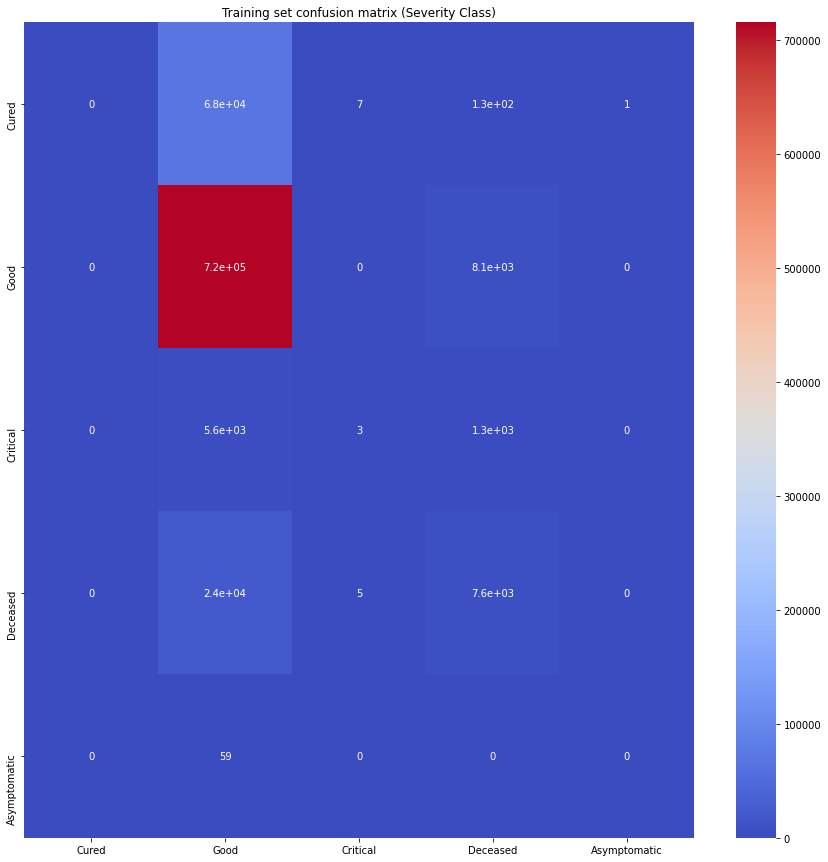

In [ ]:
cfm_train = confusion_matrix(y_train, lrobj.predict(x_train))    # Plot confusion matrix
plt.figure(figsize=(15,15))    # Initialise figure
b1 = sns.heatmap(cfm_train, cmap='coolwarm', annot=True)         # Plot seaborn heatmap of corr matrx
b1.set(title='Training set confusion matrix (Severity Class)')   # Change heatmap attributes
b1.set(xticklabels=['Cured', 'Good', 'Critical', 'Deceased', 'Asymptomatic'], yticklabels= ['Cured', 'Good', 'Critical', 'Deceased', 'Asymptomatic'])
plt.show()     # Show figure

Aside from raw accuracy numbers, confusion matrices best describe the results of a classification algorithm because it displays the correct and wrong predictions of each target class. This is measured by the number of datapoints correctly classified into the target. Positive result denotes the class itself while negative denotes predicting any other class:

* True positive: Predict positive, actual positive
* True negative: Predict negative, actual negative
* False positive: Predict positive, actual negative
* False negative: Predict negative, actual positive 

There exists a huge number of true positive points belonging to the 'Good' severity class (red shade), meaning these points are correctly classified as 'Good' (TP). The diagonal axis consists of 1 section corresponding to the true positive of each column, while all other diagonal sections are true negatives (TN). The other non-diagonal sections are either false positives (FP) or false negatives (FN). 

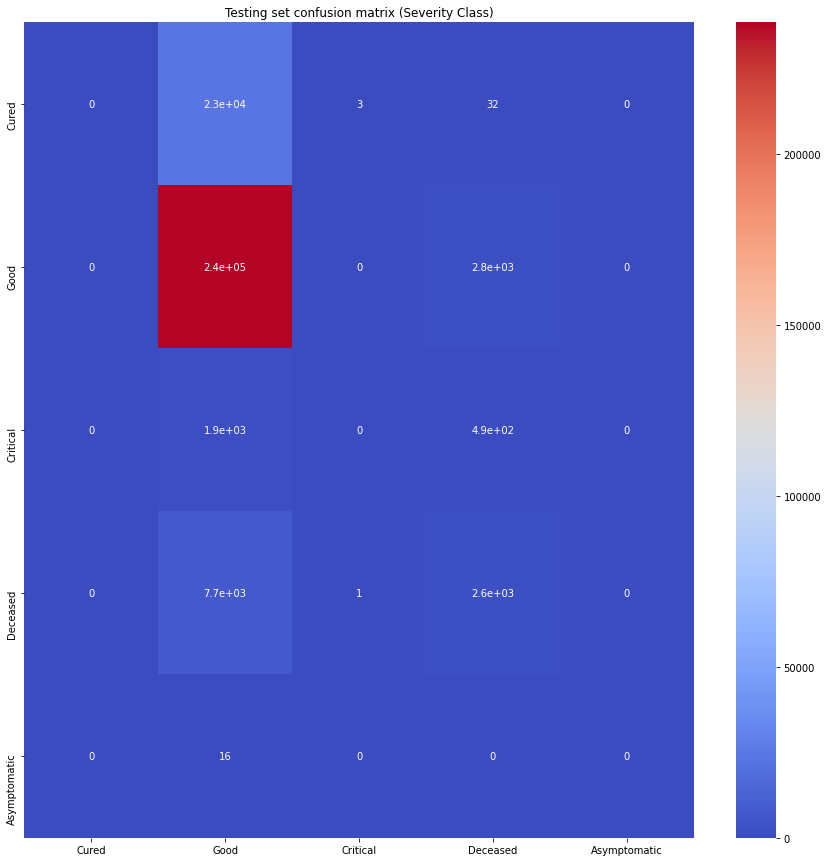

In [ ]:
cfm_test = confusion_matrix(y_test, lrobj.predict(x_test))       # Plot confusion matrix of test set                                                            
plt.figure(figsize=(15,15))                                      # Initialise figure                                                                          
b2 = sns.heatmap(cfm_test, cmap='coolwarm', annot=True)          # Plot Heatmap                                                                                            
b2.set(title='Testing set confusion matrix (Severity Class)')    # Set title
b2.set(xticklabels=['Cured', 'Good', 'Critical', 'Deceased', 'Asymptomatic'], yticklabels= ['Cured', 'Good', 'Critical', 'Deceased', 'Asymptomatic'])     # Set tick labels
plt.show()     # Show figure

Now the confusion matrix for the test set returns a predominantly similar colour shade. The severity class 'Good' still has the highest number of true positives (TP), paralleling the training set matrix. This is a good sign that our training and test sets have a near-equal composition of severity classes. We will now examine the 'Good' severity class and find out the compositions of all the classification of the datapoints in the test set. 

In [ ]:
tp, sum_tn, sum_fp, sum_fn = 238584, 0, 0, 0                         
for i in range(0,5):              # Algorithm to count TP, FP, TN, FN points
  for j in range(0,5):
    if j == 1:
      sum_fp += cfm_test[i][j]
    if i == j:
      sum_tn += cfm_test[i][j]
    if i == 1:
      sum_fn += cfm_test[i][j]
sum_tn, sum_fp, sum_fn = sum_tn - tp, sum_fp - tp, sum_fn - tp

The above code is our custom algorithm designed to calculate counts of all four classification attributes of the 'Good' severity class. The values are housed in the sum variables. 

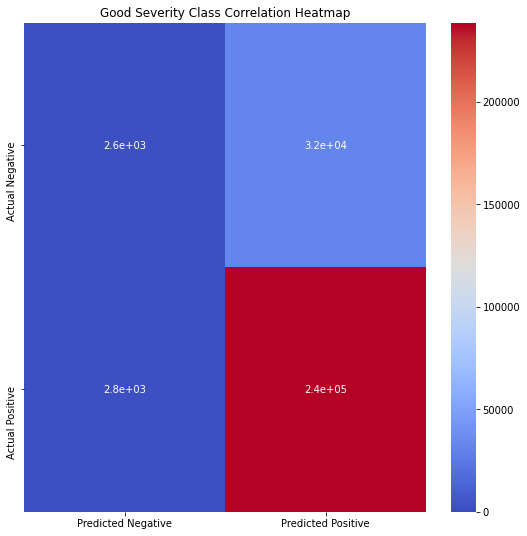

In [ ]:
plt.figure(figsize = (9,9))    # Adjust size of plot
v1 = sns.heatmap([[sum_tn, sum_fp], [sum_fn, tp]], cmap = 'coolwarm', annot=True, vmin=0)    # Plot heatmap
v1.set(title='Good Severity Class Correlation Heatmap')      # Set title
v1.set(xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels= ['Actual Negative', 'Actual Positive'])    # Set tick labels
plt.show()    # Show figure

This modified correlation matrix restricts our analysis to the 'Good' severity class only. From observation, we can see that the true positive has the most number of datapoints (240000), followed by false positive (32000). The ratio between the TP counts and the other labels contribute to a huge pool of metrics that measure classification accuracy. Precision or positivity rate is yet another measurement to gauge the accuracy of our logistic regression model. 

With these data, we derive a couple of other important metrics that will help us explain how well the model generalises to the test set. A classification report neatly summaries other lesser known but critical values.

In [ ]:
print(classification_report(y_test, lrobj.predict(x_test)))     # print classification report

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00     22698
         1.0       0.88      0.99      0.93    241346
         2.0       0.00      0.00      0.00      2349
         3.0       0.44      0.25      0.32     10244
         4.0       0.00      0.00      0.00        16

    accuracy                           0.87    276653
   macro avg       0.26      0.25      0.25    276653
weighted avg       0.78      0.87      0.82    276653



The classification report visualises all useful metrics concerning the four classification variables (TP, TN, FP, FN):

* `Precision`: Confidence of positive prediction (TP / (TP + FP))
* `Recall`: Positivity Error (TP / (TP + FN))
* `f1-score`: Ratio of Precision to Recall (2 x ((precision x recall)/(precision + recall))
* `Support`: Actual count of each severity class
* `Accuracy`: Percentage of correct predictions ((TP+TN) / all)
* `Macro avg`: Average metric
* `Weighted avg`: Average metric weighted by composition of each class





It is evident that the `precision`, `recall` and `f1-score` of the target class 1 (Good) is significantly higher than the other severity classes. This tells us that the model is very confident in the prediction of this class, as well as a low error rate as seen by the high recall. The high `f1-score` is a good classification indicator of accuracy because it represents the balance between `precision` and `recall`.


A high `precision` indicates a strong rate of accurate positive predictions while `recall` denotes the rate of error in making positive predictions. Conventionally, these two metrics trade-off with one another, henceforth why the `f1-score` is so crucial as a measurement to find a balance between these two. 

Allow us to illustrate how different the 2 metrics differ in practice. In this time period, when COVID-19 relief is crucial to flatten the curve, machine learning predictions are more compelled to be error-free than more positively precise. This is because a false classification of a patient's severity will lead to disastrous consequences. For instance, if a coronavirus patient is falsely classified as 'Cured' rather than 'Critical' (False Negative), hospitals would routinely release said patient. The following might occur:

* Increases spread of community infections
* Health worsens due to inadequate treatment
* Higher probability of death due to COVID-19

Inversely if said patient was diagnosed severely but was actually fine (False Positive), the consequences would not be as severe as the former. Possible repercussions are psychological distress and minor inconveniences. Focusing on achieving higher recall values (lower error rate) comes at the expense of higher precision values (high positive confidence). Both sides have variable consequences depending on the application.

In conventional situations we would most certainly prefer models with higher precision as they can predict with greater confidence. However, there exists many critical scenarios that are more favourable if the false negative rate (Error Rate) is mitigated (focus on recall). Recall takes into account the False Negative rate in it's calculation. In sectors like medicine and virus/crisis prevention, Recall is surely a better metric for models.

Organisations that utilise the recall metric to measure classification accuracy are mostly looking to reduce the error rate (FN) as much as possible. As such, the selection of metric choice depends on the priorities of the stakeholders and the situation at hand. 

#### Multilayer Perceptron

**Finally we proceed with the artitifical neural network courtesy of sklearn. Neural networks aim to uncover relationships between attributes similar to how the human brain functions. Neurons in a ANN function like a human neuron cell. They each take in inputs and completes a set of computations before providing an output.**

The Multilayer Perceptron refers to an ANN with multiple hidden layers consisting of weighted neurons which process a series of data to derive relationships between columns. 

We are using neural networks because they are reputed for modelling complex relationships that simpler models like "K-nearest neighbours" cannot do. They usually generalize well to unknown data. This is perfect for our classification problem. Sklearn has made building ANNs simple.

In [ ]:
mlpobj = MLPClassifier(hidden_layer_sizes = (10,))    # Create ANN object
mlpobj.fit(x_train, y_train)                          # Fit the ANN with training set
print("Training set accuracy : ", mlpobj.score(x_train, y_train))    # Score training set
print("Test set accuracy : ", mlpobj.score(x_test, y_test))          # Score test set

Training set accuracy :  0.9849871921229749
Test set accuracy :  0.9844751367236213


We begin by building a simple MLPClassifier neural network object and conduct the usual fitting and scoring procedures. The `hidden_layer_sizes` specifies our desired ANN structure in terms of the hidden layers. This is a crucial hyper-parameter which directly affects the accuracy measurements.

As shown above, a simple ANN with a single layer of 10 neurons is able to produce impressive classification accuracies of up to 98.4%. This demonstrates the ability of neural networks to map complex relations. It is no wonder that neural networks are all the talk of the town these days.

The [MLPClassifier documentation](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) shows that each hidden layer is composed of neurons which feed output to the next layer after computation is completed. The value of each neuron's output is weighted by the ANN's activation function (relu/ tanh). Prominent hyper-parameters are listed below :
* `hidden_layer_sizes` - hidden layer structure tuple
* `activation` - activation functions (relu vs tanh)
* `solver` - gradient optimiser algorithm (lbfgs, sgd, adam)
* `alpha` - L2 regularisation restriction parameter
* `max_iter` - limit on iterations

By tradition, machine learning analysis do not stop at baseline models. There is an entire career dedicated to optimising machine learning models to maximise generalisation performance and accuracy. In essence in order to obtain a more optimal model, we have to iterate through hyper-parameters and search for the best model.

Gridsearching is one popular technique for running through a fixed set of hyper-parameters to return the best model measured by a cross validated accuracy score. A sound machine learning analysis is not complete without `GridSearchCV` and a set of parameter grid indeed.

In [ ]:
param_grid = {"activation" : ["relu", "tanh"], "alpha" : [0.00001, 0.0001, 0.001]}     # Make a parameter grid of 6 combinations

The first step to a gridsearch is always to specify the grid of parameters to search from. This gives us an indication of how many neural network models will be built (3 x 2 = 6), and also the runtime. When we make these decisions it is of paramount importance to understand the complexity and computational load of running these algorithms. Data computation can take a long time if unoptimised.

We will find out which degree of regularisation (alpha) and activation function combinations give us the best model for classification.

In [ ]:
gridobj = GridSearchCV(MLPClassifier(hidden_layer_sizes = (10,), random_state = 8), param_grid, cv=5, n_jobs = -1)   # Make grid object
gridobj.fit(x_train, y_train)                                               # Fit the ANN models
print("Gridsearch of Neural Network : ")                               
print("Best cross-validation score: {:.2f}".format(gridobj.best_score_))   
print("Best parameters: ", gridobj.best_params_)
print("\nTraining Set Accuracy :")
print(round(gridobj.score(x_train, y_train), 4))
print("Test Set Accuracy : ")
print(round(gridobj.score(x_test, y_test), 4))

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:573: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


Gridsearch of Neural Network : 
Best cross-validation score: 0.99
Best parameters:  {'activation': 'relu', 'alpha': 0.001}

Training Set Accuracy :
0.97
Test Set Accuracy : 
0.9701


GridsearchCV automatically uses the model with the best cross validation accuracy to do prediction. We can then use the `.best_score_` function to obtain the best mean cross validation score of the model picked. In the same vein, printing the best model's parameters is easy with `.best_params_`. Gridsearch makes finding the optimal model among our chosen parameters slightly simpler. 

From the above results, we obtain the best model with a cross validated accuracy of 99%. This model which drafted it's parameters through validation sets gave us a 97% accuracy. It is easy to dismiss this technique having a lower accuracy than the baseline ANN (98.4%). However, the values from the model produced by gridsearch is known to be more trustworthy given cross validation.

The most optimal ANN we obtained runs on the 'relu' activation function with an alpha regularisation of 0.001. We are confident we can obtain better results given more or better computational resources to run the algorithm.

In theory it would be tempting to perform gridsearch across a wide array of hyper-parameters to obtain the supposedly 'best' model possible. However, this is unrealistic because of the gigantic computational time and complexity needed to build models after models. We are essentially limited to finding the best model amongst our stated parameters only.

We can evaluate the neural network's performance not only with accuracy value, but also other classification metrics that we detailed earlier in the Logistic Regression part earlier. Apart from the inner workings of each algorithm, the results they provide tell the same story albeit with different complexity. 

Neural networks are higher level machine learning models as compared to logistic regression. As such, naturally our MLPClassifier baseline model scored higher accuracies on both sets than with Logistic Regression did. In the same way, we expect a higher precision and f1-score from ANNs accordingly.

While we rejoice in seeing better figures from this model, note that the time required to run a neural network is several times longer than a logistic regression takes conventionally. The choice of model to use lies with your priorities and runtime budget.

### Conclusion

In this notebook, we have convincingly explored two different machine learning algorithms and their generalisation performance on unknown test set data. One interesting detail to mention is that both ML models were baseline models with no tuning of hyper-parameters to obtain the best model to predict the severity class. 

Taken as a whole, our 2 notebooks have covered not only the macroscopic and microscopic factors of the covid 19 outbreak, but also model solutions to help healthcare providers predict the severity of a patient based on their characteristics. Below is a summary of what we have covered thus far:
* How each country has handled Covid 19
* Factors affecting each country's fight
* Summary of coronavirus patient data
* Study of potential traits affecting severity of Covid 19 in patients
* Model predictions of how severe a patient's condition is 

Using our model, countries can more efficiently allocate healthcare resources to cater to patients with a higher severity or probability of dying. This will reduce the scale of the outbreak in terms of confirmed cases and deaths worldwide. We have great optimisism that these machine learning solutions can make an impact and fight against Covid 19 which has seen many livelihoods overturned. As wise men once said :
>"Our greatest glory is not in never falling, but rising everytime we fall".    
~Confucius


This setback is prime breeding ground for more innovative technological solutions that will ultimately improve our lives in the future as we know it. Thank you.